In [1]:
# Load libraries
library(data.table)
setwd('/Users/denis/Documents/Projects/cmap/cmap-l1000-analysis')
source('/Users/denis/Documents/Projects/scripts/Support.R')

### Infiles

In [2]:
# Get infiles
infiles <- c('f1-processed_data.dir/cmap_l1000-expression_data.txt', 'f1-processed_data.dir/cmap_l1000-sample_annotations.txt')

In [3]:
# Read expression data
expressionDataframe <- as.data.frame(fread(infiles[1]))
rownames(expressionDataframe) <- expressionDataframe$gene_id
expressionDataframe$gene_id <- NULL

# Read annotation data
sampleAnnotationDataframe <- read.table(infiles[2], sep='\t', header=TRUE, row.names='sample_id')

# Get unique cell names
cellTypes <- as.character(unique(sampleAnnotationDataframe$cell_id))

# Split samples by cell line
splitSamples <- sapply(cellTypes, function(x) rownames(sampleAnnotationDataframe[sampleAnnotationDataframe$cell_id==x,]))

# Get N
nGenes <- 100
    
# Get top variable genes
topGenes <- sapply(cellTypes, function(x) names(sort(apply(expressionDataframe[,splitSamples[[x]]], 1, var), decreasing=TRUE))[1:nGenes], simplify=FALSE)

# Run PCA
pcaResults <- sapply(cellTypes, function(x) runPCA(expressionDataframe[topGenes[[x]], splitSamples[[x]]]), simplify=FALSE)

Read 22268 rows and 5450 (of 5450) columns from 0.792 GB file in 00:00:11


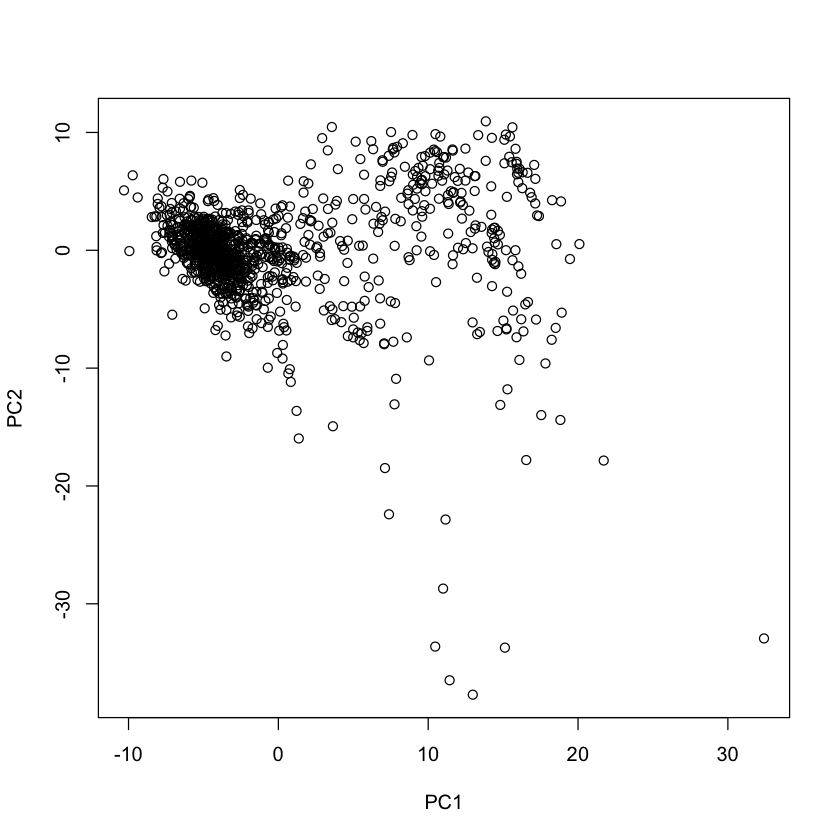

In [14]:
plot(pcaResults[[1]]$x[,1:2])

In [12]:
cellTypes

[1] "HEPG2"  "HT29"   "JURKAT" "MCF7"   "PC3"